In [48]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red"> ch11. 데이터프레임과 시리즈(Pandas) </font></b>

- pip install pandas

# 1절. 판다스 패키지

- 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이를 기반으로 하며,
  다른 많은 라이브러리와 잘 통합되도록 설계
  
  
- 2차원 구조를 갖는 데이터프레임, 1차원 구조를 갖는 시리즈를 제공


- 판다스 장점 : 
    * 데이터프레임 생성, 파일io, 레이블링, 부분데이터 추출, 
    * 크기변경(행이나 열 삽입, 삭제), 데이터 분할, 병합, 데이터구조변경, 결측치 처리


- https://pypi.python.org/pypi/pandas(package index)
- http://pandas.pydata.org/pandas-docs/stable/api.html(API reference)

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [3]:
# shift tab tab 을 좀 더 진하게 보고싶을때 ? 사용

pd.read_json?

In [7]:
data = pd.read_json('data/ch09_member1.json', encoding='cp949') # 데이터프레임의 파일 입출력 기본은 utf-8. with 로 오픈했을때는 기본이 cp949였음
display(data) 
print(type(data))
print(data) # print로 감싸면 가독성이 떨어짐

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울
1,김길동,40,kimdong@hong.com,부산
2,신길동,30,sindong@hong.com,대전


<class 'pandas.core.frame.DataFrame'>
  Name  Age             Email Address
0  홍길동   20  kildong@hong.com      서울
1  김길동   40  kimdong@hong.com      부산
2  신길동   30  sindong@hong.com      대전


In [8]:
member4 = pd.read_csv('data/ch09_member4.csv')
member4

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울
1,김길동,40,kimdong@hong.com,부산
2,신길동,30,sindong@hong.com,대전


In [9]:
member1 = pd.read_csv('data/ch09_member1.csv')
member1 # 헤더가 없으면 맨 윗줄을 무조건 헤더로 읽어버림

,홍길동,20,kildong@hong.com,서울시 관악구
0,김길동,40,kimdong@hong.com,서울시 영등포구
1,신길동,30,sindong@hong.com,서울시 동작구


In [11]:
member1 = pd.read_csv('data/ch09_member1.csv',
                      header=None,
                      names=['name','age','email','address'])
member1 

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


# 2절. 데이터프레임 만들기

## 2.1 딕셔너리 리스트를 이용해서 데이터프레임 만들기

In [13]:
d = [{'kor':100, 'mat':95}, {'kor':90, 'mat':99}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [14]:
df.to_dict() # 데이터프레임을 딕셔너리

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [16]:
df.to_numpy() # 데이터프레임을 넘파이배열
df.values     # 데이터프레임을 넘파이배열

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [17]:
df.dtypes # 열의 타입

kor    int64
mat    int64
dtype: object

In [18]:
df.info() # ★★★★ 정말 많이씀 non-null 은 결측치가 없다는말

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [19]:
df['kor'].dtype

dtype('int64')

In [20]:
# 타입변경(열마다)

import numpy as np

df['kor'].astype(np.float64)
df['kor'].astype('float64')

0    100.0
1     90.0
Name: kor, dtype: float64

In [21]:
df.info() # 위에 astype은 출력만될뿐 진짜 float로 바뀐게 아님. 할당을 해야함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [22]:
df['kor'] = df['kor'].astype('float64')

In [23]:
df.info() # 할당을 해주니 이제 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   mat     2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [27]:
d = [{'kor':100.0, 'mat':95}, {'kor':90, 'mat':99}, {'kor':92, 'eng':99}]
df = pd.DataFrame(data=d)
df

,kor,mat,eng
0,100.0,95.0,NaN
1,90.0,99.0,NaN
2,92.0,NaN,99.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
 2   eng     1 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 200.0 bytes


In [26]:
type(np.nan) # np.nan 결측치는 실수 타입. 그래서 결측치가 하나라도 있으면 나머지가 실수로 바뀜

float

In [28]:
df['kor'] = df['kor'].astype('int32')
df

,kor,mat,eng
0,100,95.0,NaN
1,90,99.0,NaN
2,92,NaN,99.0


In [ ]:
# 결측치는 int로 형변환 불가(결측치를 대체값으로 치환 후 변환)

# df['mat'] = df['mat'].astype('int32') 이건 에러남

## 2.2 리스트를 이용해서 데이터프레임 만들기

In [30]:
kor = [100,90,95,90,65]
mat = [99,100,95,98,94]

df = pd.DataFrame({'kor':kor, 'mat':mat})
df.head(2) # 상위 2행만. 데이터가 너무 많아서 조금만 보고싶을때

,kor,mat
0,100,99
1,90,100


In [31]:
np.c_[kor,mat]

array([[100,  99],
       [ 90, 100],
       [ 95,  95],
       [ 90,  98],
       [ 65,  94]])

In [33]:
df = pd.DataFrame(data = np.c_[kor,mat], columns=['국어', '수학']) # columns 안에는 특수문자, space 쓸 수 는 있지만 안쓰는걸 추천
df # 행이름은 index 열이름은 columns

,국어,수학
0,100,99
1,90,100
2,95,95
3,90,98
4,65,94


In [34]:
df.shape

(5, 2)

In [36]:
l = [['트렌드 코리아2026', '김난도', 18000, 10],
    ['사탄탱고', '라슬로', 17820, 10],
    ['미술관 여행자', '카미유주노', 29700, 10]]

df = pd.DataFrame(l, columns=['책이름', '저자', '가격', '할인율'])
df

,책이름,저자,가격,할인율
0,트렌드 코리아2026,김난도,18000,10
1,사탄탱고,라슬로,17820,10
2,미술관 여행자,카미유주노,29700,10


In [ ]:
# %ls : ipython 매직명령어
# !dir : 쉘명령어

In [49]:
%ls "C:\Users\Admin\AI\downloads\shareData\상가정보"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A014-DCD6

 C:\Users\Admin\AI\downloads\shareData\상가정보 디렉터리

2025-10-13  오후 03:54    <DIR>          .
2025-10-13  오후 03:54    <DIR>          ..
2025-04-27  오후 11:07             1,011 [필독]파일열람방법.txt
2025-04-27  오후 11:07        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-27  오후 11:07       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-27  오후 11:07        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-27  오후 11:07        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-27  오후 11:07        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-27  오후 11:07        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-27  오후 11:07        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-27  오후 11:07        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-27  오후 11:07       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-27  오후 11:07         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-27  오후 11:07        28,457,48

In [54]:
df = pd.read_csv(r'C:\Users\Admin\AI\downloads\shareData\상가정보\소상공인시장진흥공단_상가(상권)정보_서울_202503.csv', nrows=70) # 처음 70행만 가져오기
df.shape # 70행 가져와라고 했으니 70행 39열

(70, 39)

In [55]:
df.head(1) # 상위1행만

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.98184,37.58625


In [58]:
# 판다스 디스플레이 옵션

pd.options.display.max_columns = 39 # 39열까지 display 가능. 기본값은 20
pd.options.display.max_rows = 70    # 70행까지 display 가능. 기본값은 60

In [59]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,기타 비알코올 음료점업,11,서울특별시,11110,종로구,11110540,삼청동,1111014000,삼청동,1111014000100280021,1,대지,28,21.0,서울특별시 종로구 삼청동 28-21,111103100007,서울특별시 종로구 삼청로,122,1.0,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.98184,37.58625


In [60]:
df.head(1).T # 위에 가독성이 너무 구려서 전치행렬을 적용하여 보는것. 

,0
상가업소번호,MA010120220800000033
상호명,부동산임대김은숙
지점명,NaN
상권업종대분류코드,I2
상권업종대분류명,음식
상권업종중분류코드,I212
상권업종중분류명,비알코올
상권업종소분류코드,I21201
상권업종소분류명,카페
표준산업분류코드,I56229


## 2.3 read_csv

In [62]:
# help(pd.read_csv)
# pd.read_csv() # 함수 안에서 shift + tab + tab
pd.read_csv?

In [64]:
# (1) CSV 파일 불러오기(기본값)

member = pd.read_csv('data/ch11_member.csv',
                    #, encoding = 'utf-8', sep=',', comment 주석처리X
                    )
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [69]:
# 문자형으로 읽어들인 Birth를 datetime형으로 변경
# 형변환 : astype('int64'), astype('datetime64')
#         to_datetime()함수

# member['Birth'].astype('datetime64') 비추
member['Birth'] = pd.to_datetime(member['Birth']) # datetime은 이거를 조금 더 많이씀. 숫자로 바꿀때는 astype을 더 많이쓰고.
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [68]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     6 non-null      object        
 1   Age      6 non-null      int64         
 2   Email    6 non-null      object        
 3   Address  6 non-null      object        
 4   Birth    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 368.0+ bytes


In [73]:
import numpy as np
member['Age'] = member['Age'].astype(np.int16)
member.dtypes

Name               object
Age                 int16
Email              object
Address            object
Birth      datetime64[ns]
dtype: object

In [75]:
# (2) 특정행을 제외하고 csv파일 읽어오기

member = pd.read_csv('data/ch11_membercp949.csv', encoding='cp949',
                    skiprows=[1,6]) # 1,6번째 행 제외하고 읽어오기(시작은 1부터)
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [76]:
# (3) 상위 몇행만 sep문자는 , 아닌 csv파일 읽어오기

member = pd.read_csv('data/ch11_membersep.csv',
                    nrows=5)
member

,Name|Age|Email|Address|Birth
0,홍길동|20|hong@hong.com|서울시 강동구|1999-01-01
1,홍길서|30|seo@hong.com|서울시 중구|1999-12-01
2,홍길남|21|nam@hong.com|서울시 강동구|1999-11-01
3,홍길북|22|buk@hong.com|서울시 관악구|1999-05-01
4,홍길중|23|mid@hong.com|부산시 중구|1999-01-30


In [77]:
member = pd.read_csv('data/ch11_membersep.csv',
                    nrows=5, # 상위 5행만
                    sep = '|')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [79]:
# (4) 주석(#)제외, datetime형 필드를 지정하여 csv파일 읽어오기

member = pd.read_csv('data/ch11_membertab.csv',
                    sep = '\t', # 구분자 설정
                    comment='#', # 주석제외
                    parse_dates=['Birth']) # datetime64형으로 읽어올 필드 지정
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [80]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


## 2.4 패키지에서 가져오기 : iris 데이터

- iris 가져오기 방법 1 : sklearn (머신러닝 패키지)
- iris 가저오기 방법 2 : statsmodels (R 데이터)
- iris 가저오기 방법 3 : seaborn (시각화패키지)

### (1)  iris 방법 1 : sklearn

- sklearn.datasets 모듈 데이터(iris)를 데이터프레임으로 변환

In [86]:
# sklearn 패키지에서 제공되는 데이터셋은 딕셔너리형식으로 제공

from sklearn import datasets # 머신러닝을 공부하기 위한 학습 데이터셋 제공

iris = datasets.load_iris()
print(type(iris)) # Bunch타입(딕셔너리를 상속받은 타입) 딕셔너리처럼 동작
# iris.get('data') / iris['data']
iris.data # 이렇게 쓸 수 있기때문에 딕셔너리보다 조금 더 편하다고 하는것
# print(iris.DESCR) # iris 데이터 셋의 설명
print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [87]:
iris.data # 독립변수
iris['data'][:3] # 상위 3행

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [88]:
# 데이터프레임의 열이름 (비추)

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [91]:
# 데이터프레임의 열이름 (강추)

[col[:-5].replace(' ','_') for col in iris.feature_names]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [93]:
iris.target # ML/DL 학습시 타겟변수(종속변수)
# iris['target']
# iris.get('target')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [94]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [96]:
iris.target_names[iris.target] # 데이터프레임에 쓸 타겟변수(가장 오른쪽 열)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [98]:
# 독립변수 

data = iris.data

# 종속변수

target = iris.target_names[iris.target].reshape(-1,1)
print(data[:3], target[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [['setosa']
 ['setosa']
 ['setosa']]


In [99]:
print('독립변수 shape :', data.shape)
print('타겟변수 shape :', target.shape)

독립변수 shape : (150, 4)
타겟변수 shape : (150, 1)


In [103]:
# 1. 독립변수와 종속변수를 stack한후 데이터프레임으로 

df = pd.DataFrame(np.hstack((data, target)),
                 columns=iris.feature_names + ['species'])
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


In [104]:
df.species
# df.sepal length (cm) # 이렇게 가져올 수 없기 떄문에 독립변수에 space, '.' 등을 안쓰는게 좋음. 에러남
df['sepal length (cm)'] # 이렇게는 가져올 수 있지만 위에처럼 쓰는게 편하기 때문에

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [105]:
df.columns = [col[:-5].replace(' ','_') for col in iris.feature_names] + ['species']
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [106]:
df.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: object

In [108]:
# 2. 독립변수, 종속변수를 따로 데이터프레임으로 생성 → 두 데이터프레임을 연결

X = pd.DataFrame(iris.data,
                columns = [col[:-5].replace(' ','_') for col in iris.feature_names])
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [109]:
y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
y.head(1)

,species
0,setosa


In [111]:
print('X의 shape :', X.shape)
print('y의 shape :', y.shape)
print('X의 index :', X.index)
print('y의 index :', y.index)

X의 shape : (150, 4)
y의 shape : (150, 1)
X의 index : RangeIndex(start=0, stop=150, step=1)
y의 index : RangeIndex(start=0, stop=150, step=1)


In [113]:
iris_df = pd.concat([X,y], axis=1) #두개의 데이터프레임을 열로 연결
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### (2) iris 방법 2 : statsmodels

In [2]:
# R 패키지의 기본 데이터 가져오기

from statsmodels.api import datasets
iris_dataset = datasets.get_rdataset('iris',
                                    package='datasets',
                                    cache=True) # 한번 다운로드한 데이터를 pc에 저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [5]:
iris = iris_dataset.data
iris.head() # 기본이 상위 5행

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.Species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [7]:
iris['Sepal.Length']
# iris.Sepal.Length 열이름에 .이 있으면 접근불가

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [12]:
iris.columns = [col.replace('.','_').lower() for col in iris.columns]
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### (3) iris 방법 3 : seaborn

In [13]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


#### 파일 출력

In [15]:
# 데이터프레임을 파일로 출력 (4k)

iris.to_csv('data/ch11_iris.csv',
           sep=',', encoding='utf-8', # 기본값, 생략가능
           index=False) # 행이름이 생략되어 파일 출력 (0,1,2,3... 같은 인덱스번호 말함)

In [16]:
# 압축. 백업 시간 단축 (889B)

iris.to_csv('data/ch11_iris.csv.gz',
           index=False,
           compression='infer') # 파일 확장자에 맞게 압축

In [17]:
import pandas as pd

read_iris = pd.read_csv('data/ch11_iris.csv')
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [18]:
read_iris = pd.read_csv('data/ch11_iris.csv.gz', compression='infer') # 압축한건 꼭 압축한 이름으로 불러오기
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# 3절. 이름(열, 행) 지정하기

## 3.1 열이름 지정하기

In [20]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth']) # 모든 열에 날짜가 있어야 에러가 안남
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [22]:
member.columns = ['이름','나이','메일','주소','생년월일'] # 열이름 지정할때 열 수에 맞춰 작성
member.head(1)

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 3.2 행이름 지정하기

In [23]:
member.index # 이게 행이름

RangeIndex(start=0, stop=5, step=1)

In [24]:
member.index = range(11,16)
member

,이름,나이,메일,주소,생년월일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [25]:
member.index = ['동', '서', '남', '북', '중']
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [26]:
# 홍길동을 가져오고싶음
# []를 바로 쓸 수 있는건 ['이름'] 처럼 열이름 혹은 조건만 가능.

# member['이름']['동'] 정말정말 비추
member.loc['동','이름']

'홍길동'

In [27]:
# 행과 열이름으로 부분 데이터 조회 : loc

member.loc['북','주소']

'서울시 관악구'

In [28]:
# index를 이름열로 (실행결과가 출력되어서 나오면 return될뿐, member는 안바뀜)

member.set_index('이름')

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [33]:
member.head(1)

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [32]:
# member를 수정하려면 (1)할당

member1 = member.set_index('이름')
member1.head(1)

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [34]:
# member를 수정하려면 (2) inplace 매개변수에 True(기본값은 False) , return 이 되질 않으니 member이 바뀐것. 
# 2번 실행하면 이름이라는 열이 없으니까 에러남. 지금 바꾼것은 이름이라는 열이 아니라 이름이라는 index로 바꾼것.

member.set_index('이름', inplace=True)

In [35]:
member.head(1)

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [36]:
member.index

Index(['홍길동', '홍길서', '홍길남', '홍길북', '홍길중'], dtype='object', name='이름')

In [38]:
# 인덱스를 컬럼으로 편입시키기

member.reset_index(inplace=True)

In [40]:
member.head(1)

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [41]:
member.index = [0,1,2,0,1] # 인덱스는 중복가능
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
0,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
1,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [44]:
# 기존의 index를 새로운 열에 편입시키지 않고 제거한 후, 새로운 숫자 index로 초기화

# member.index = range(len(member)) # 없어보이는 방법
member = member.reset_index(drop=True)
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [46]:
# datetime열에서 날짜 및 시간에 관련된 정보를 추출 : 시리즈.dt # 시리즈(1차원데이터. 판다스의 1차원데이터만 시리즈라고함)

member['생년월일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생년월일, dtype: int64

In [47]:
member['생년월일'].dt.month

0     1
1    12
2    11
3     5
4     1
Name: 생년월일, dtype: int64

In [48]:
member['생년월일'].dt.weekday # 0월, 1화, 2수... 5토, 6일

0    4
1    2
2    0
3    5
4    5
Name: 생년월일, dtype: int64

## 3.3 레벨이름 지정하기

In [49]:
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [51]:
print(member.columns)
print(member.columns.name)

Index(['이름', '나이', '메일', '주소', '생년월일'], dtype='object')
None


In [52]:
member.columns.name = '정보'
member

정보,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [53]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                 ['이름','나이','메일','주소','생년월일']]
member.columns.names = ['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소       생년월일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [54]:
member.index = [['좌우','좌우','좌우','상하','상하'],
               ['동','서','남','북','중']]
member.index.names = ['레벨1', '레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소       생년월일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
    남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
상하  북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [55]:
member.loc[('상하','북'),('기본정보','이름')] # 이럴때는 엄청 불편함

'홍길북'

In [56]:
member.loc['상하','기본정보'] # 이럴때 편함

소분류,이름,나이,메일
레벨2,,,
북,홍길북,22,buk@hong.com
중,홍길중,23,mid@hong.com


In [59]:
member.loc[('상하','중'),'기본정보']

소분류
이름             홍길중
나이              23
메일    mid@hong.com
Name: (상하, 중), dtype: object

# 4절. 부분 데이터 조회

In [60]:
member = pd.read_csv('data/ch11_member.csv', comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 단일 열 조회

In [62]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [ ]:
# member[0] 행이름으로 []로 조회할 경우 에러

In [64]:
member[['Name','Address']] # []안에 리스트를 넣어 여러 열 출력도 가능

,Name,Address
0,홍길동,서울시 강동구
1,홍길서,서울시 중구
2,홍길남,서울시 강동구
3,홍길북,서울시 관악구
4,홍길중,부산시 중구


## 4.2 loc을 이용한 조회

- df.loc[행이름, 열이름] : 행이름, 열이름으로 조회
    * 행이름과 열이름자리에 슬라이싱 from:to - from부터 to까지 (to 포함)
    * 행이름과 열이름자리에 리스트

In [65]:
member.loc[0:2]
member.loc[0:2,]
member.loc[0:2, :] # 모든 열을 다 출력할 경우 열 생략가능
member.loc[0:2, ...]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [66]:
member.index = ['동','서','남','북','중']
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [67]:
member.loc['동':'남', 'Name':'Address'] # 동~남행, Name~Address열까지

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [68]:
# 동,남행, Name, Email, Address열

member.loc[['동','남'],['Name','Email','Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [69]:
member.loc[:, 'Name']

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

In [70]:
# 위의 1차원이 마음에 안들경우 이렇게 쓰기

member.loc[:, :'Name']

,Name
동,홍길동
서,홍길서
남,홍길남
북,홍길북
중,홍길중


## 4.3 iloc을 이용한 조회

- df.iloc[행순번, 열순번] : 행순번, 열순번로 조회
    * 행순번과 열순번자리에 슬라이싱 from:to:by - from부터 to앞까지 by씩 (to 미포함)
    * 행순번과 열순번자리에 리스트

In [71]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [74]:
# 0번째 행

member.iloc[0]

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [72]:
# 동(0)행부터 남(2)행까지 모든 열

member.iloc[0:3]
member.iloc[0:3,]
member.iloc[0:3, :]
member.iloc[0:3, ...]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [73]:
# 동행부터 남행까지 Name(0)열부터 Address(3)열까지

member.iloc[:3, :4]
member.iloc[:3, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [75]:
# 동행과 남행, Name(0)열, Email(2)열, Address(3)열

member.iloc[[0,2],[0,2,3]]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [81]:
# Name(0)열

member.iloc[:, 0]

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

In [76]:
# 짝수번째 행의 마지막 열을 제외하고 출력(독립변수를 추출하기 위해 주로 씀)

member.iloc[::2, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [77]:
# 마지막행부터 처음행까지 거꾸로 출력

member.iloc[::-1]

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 4.4 조건으로 조회하기

In [82]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [83]:
member['Name']=='홍길남'

동    False
서    False
남     True
북    False
중    False
Name: Name, dtype: bool

In [85]:
# Name이 홍길남인 행을 모두 출력

member[member['Name']=='홍길남']
member.loc[member['Name']=='홍길남']
# member.loc[[False, False, True, False, False]] 위의 조건이 이런 식으로 작동하는것

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [86]:
# Name에서 홍길남의 이름과 나이, 이메일 출력

member.loc[member['Name']=='홍길남', 'Name':'Email']

,Name,Age,Email
남,홍길남,21,nam@hong.com


In [87]:
# Name에서 홍길남의 이름과 이메일 출력

member.loc[member['Name']=='홍길남', ['Name','Email']]

,Name,Email
남,홍길남,nam@hong.com


In [93]:
# 23세 이상 데이터만 조회 (모든열)

member[member['Age']>=23]
member.loc[member['Age']>=23]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [91]:
# 23세 이상 데이터만 조회 Name, Age, Email

member.loc[member['Age']>=23, 'Name':'Email']

,Name,Age,Email
서,홍길서,30,seo@hong.com
중,홍길중,23,mid@hong.com


In [92]:
# 23세 이상 데이터만 조회 Name, Age, Address

member.loc[member['Age']>=23, ['Name','Age','Address']]

,Name,Age,Address
서,홍길서,30,서울시 중구
중,홍길중,23,부산시 중구


In [94]:
# ~ : 반대 (반드시 ()안에 넣어야함)

member[~(member['Age']>=23)]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [97]:
address = '서울시 관악구'
print('서울시로 시작하는지 여부 :', address.startswith('서울시'))
print('중구가 포함 여부 :', address.find('중구')!=-1) # -1이 안나온다 그러면 중구가 True. 저거 안쓰면 원래는 -1 반환

서울시로 시작하는지 여부 : True
중구가 포함 여부 : False


In [ ]:
# member['Address'].startswith('서울시')

※ 시리즈에 문자함수를 쓰기 위해 참조:

https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [102]:
# 서울시로 시작하는 데이터

member['Address'].str.startswith('서울시')

동     True
서     True
남     True
북     True
중    False
Name: Address, dtype: bool

In [103]:
member[member['Address'].str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [109]:
# Address에 중구를 포함하는 데이터 (방법1)

member[member['Address'].str.find('중구')!=-1]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [107]:
# Address에 중구를 포함하는 데이터 (방법2)

member[member['Address'].str.contains('중구')]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [111]:
# 시리즈.isin([]) . 지금까지는 문자열 함수였음. 그래서 .str을 붙여서 사용해야 작동했다
# 이름이 홍길동이거나 홍길남인 데이터

member[member['Name'].isin(['홍길남','홍길동'])]
member.loc[member['Name'].isin(['홍길남','홍길동'])]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [112]:
# 이름이 홍길동이거나 홍길남인 데이터의 이름, 주소, 생일

member.loc[member['Name'].isin(['홍길남','홍길동']), ['Name','Address','Birth']]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
남,홍길남,서울시 강동구,1999-11-01


In [114]:
# 2000년 이전에 태어난 데이터

member[member['Birth'].dt.year<2000]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [118]:
# 조건 연산자를 이용해서 추출(조건 2개)

import numpy as np
import pandas as pd
data = pd.DataFrame({'eng':[np.nan,80,np.nan,85],
                    'kor':[100,80,60,np.nan]})

display(data)

# 영어 80이상이고, 국어 80이상인 데이터 추출

data[(data['eng']>=80) & (data['kor']>=80)]

,eng,kor
0,NaN,100.0
1,80.0,80.0
2,NaN,60.0
3,85.0,NaN


,eng,kor
1,80.0,80.0


In [119]:
# 결측치 확인 방법 1 : 4 entries 와 non-null 앞의 숫자를 뺀 숫자가 결측치의 갯수

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   eng     2 non-null      float64
 1   kor     3 non-null      float64
dtypes: float64(2)
memory usage: 192.0 bytes


In [120]:
# 결측치 확인 방법 2

data.isna() # 결측치 여부

,eng,kor
0,True,False
1,False,False
2,True,False
3,False,True


In [121]:
True + True + False # 1+1+0 = 2

2

In [122]:
# 각 열의 결측치 갯수

data.isna().sum() # sum() = sum(axis=0)

eng    2
kor    1
dtype: int64

※ 데이터프레임의 부분 데이터 조회방법
- df[열이름] : 특정열 조회
- df[조건] : 조건에 맞는 모든행 조회
- df.loc[행이름, 열이름]
    * 행이름, 열이름 자리에 슬라이싱, 리스트
    * 열이름 생략시 모든열
    * 행이름 자리에 조건
- df.iloc[행순번, 열순번]
    * 행순번, 열순번 자리에 슬라이싱, 리스트
    * 열순번 생략시 모든열

### quiz

- 데이터프레임 조건 추출 quiz

In [ ]:
# 1. sepal_length 열만 출력
iris.sepal_length

# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[:10, :'petal_width']
iris.iloc[:11, :4]
iris.iloc[:11, :-1]

# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10, ['sepal_length','petal_length']]
iris.iloc[3:11, [0,2]]

# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[:100:50]
iris.iloc[:101:50]

# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[:125:25, ['petal_length','petal_width']]
iris.iloc[::25,2:4]
iris.iloc[:126:25, 2:-1]

# 6. species가 versicolor인 데이터의 모든 열
iris[iris['species']=='versicolor']

# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris.loc[iris['species']=='setosa'].head()

# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris.loc[iris['sepal_length']>=6.5].head()

# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris['sepal_length']>=7.2, ['sepal_length','sepal_width','petal_length']]

# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris.loc[(iris['species']=='versicolor') & (iris['sepal_length']>6.5)]

In [164]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 0. iris 데이터 가져오기

# 1번방법

# 2번방법
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.replace('.','_').lower() for col in iris.columns]

# 3번방법
import seaborn as sns
iris = sns.load_dataset('iris')

In [126]:
# 1. sepal_length 열만 출력

iris.sepal_length
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [131]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)

iris.loc[:10, :'petal_width']
iris.iloc[:11, :4]
iris.iloc[:11, :-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [133]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)

iris.loc[3:10, ['sepal_length','petal_length']]
iris.iloc[3:11, [0,2]]

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [135]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)

iris.loc[:100:50]
iris.iloc[:101:50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [138]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)

iris.loc[:125:25, ['petal_length','petal_width']]
iris.iloc[::25,2:4]
iris.iloc[:126:25, 2:-1]

,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [141]:
# 6. species가 versicolor인 데이터의 모든 열

iris[iris['species']=='versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [172]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력

iris[iris['species']=='setosa'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [169]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력

iris[iris['sepal_length']>=6.5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [171]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'

iris.loc[iris['sepal_length']>=7.2, ['sepal_length','sepal_width','petal_length']]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [166]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열

iris[(iris['species']=='versicolor') & (iris['sepal_length']>6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [167]:
import numpy as np

In [168]:
np.logical_and(iris['species']=='versicolor',
              iris['sepal_length']>6.5)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

# 5절. 데이터 삭제 및 추가

## 5.1 데이터프레임의 요소 삭제 

- df.drop(삭제할 열이름이나 행이름, axis)
    * axis=0(기본값)일때는 행 삭제, axis=1일때는 열 삭제

In [173]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [174]:
# 1) 단일 행 삭제

member.drop('중')  # axis=0 (기본값) : 해당 행 삭제

# 삭제한 결과를 member 적용 (1)할당 member = member.drop('중', axis=0) 
#                        (2) member.drop('중', axis=0, inplace=True)

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [175]:
# 2) 복수 행 삭제

member.drop(['동','서','남'])

,Name,Age,Email,Address,Birth
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [176]:
# 3) 열 삭제

member.drop(['Name', 'Email'], axis = 1)

,Age,Address,Birth
동,20,서울시 강동구,1999-01-01
서,30,서울시 중구,1999-12-01
남,21,서울시 강동구,1999-11-01
북,22,서울시 관악구,1999-05-01
중,23,부산시 중구,1999-01-30


## 5.2 데이터프레임의 요소 추가

In [177]:
# 1) 열추가

member['nickname'] = '빼곰이'
member

,Name,Age,Email,Address,Birth,nickname
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이


In [178]:
# 2) 리스트를 이용한 열 추가
member['favorite_no'] = [3,2,7,None,12]
member

,Name,Age,Email,Address,Birth,nickname,favorite_no
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이,3.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이,2.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이,12.0


In [179]:
# 3) favorite_num열에 결측치를 할당후, 원하는 데이터에 다시 할당

member['favorite_num'] = np.nan
member.iloc[::2, -1] = 7
member

,Name,Age,Email,Address,Birth,nickname,favorite_no,favorite_num
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이,3.0,7.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이,2.0,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이,7.0,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이,NaN,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이,12.0,7.0


In [180]:
member.drop(['Email','Birth','favorite_no','favorite_num'], axis=1, inplace=True)

In [181]:
# 4) 딕셔너리로 행 추가 (리스트로 한번 감싸야 데이터프레임으로 만들 수 있음)

new_member = pd.DataFrame([{'Name':'홍길쑥', 'Age':30, 'Address':'서울','nickname':'빠꼼이'}])
new_member

,Name,Age,Address,nickname
0,홍길쑥,30,서울,빠꼼이


In [184]:
# 두 데이터 프레임 연결

member = pd.concat([member, new_member]).reset_index(drop=True)
member

,Name,Age,Address,nickname
0,홍길동,20,서울시 강동구,빼곰이
1,홍길서,30,서울시 중구,빼곰이
2,홍길남,21,서울시 강동구,빼곰이
3,홍길북,22,서울시 관악구,빼곰이
4,홍길중,23,부산시 중구,빼곰이
5,홍길쑥,30,서울,빠꼼이
6,홍길쑥,30,서울,빠꼼이


# 6절. 병합과 연결

## 6.1 merge()를 이용한 데이터프레임 병합

In [187]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','d'],
                   'c2':[10,20,30,40]})
df1.merge(df2)

,key,c1,c2
0,a,1,10
1,b,2,20
2,c,3,30
3,d,4,40


In [188]:
# 내부조인 : 양쪽이 다 일치하는 데이터만 병합 (기본)
# how='inner' 기본

df1 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','f'],
                   'c2':[10,20,30,40]})
df1.merge(df2)

,key,c1,c2
0,a,1,10
1,b,2,20
2,c,3,30


In [189]:
# 왼쪽의 df1 데이터는 모두 남기고 오른쪽 df2가 매칭되도록

df1.merge(df2, how='left')

,key,c1,c2
0,a,1,10.0
1,b,2,20.0
2,c,3,30.0
3,d,4,NaN


In [190]:
# 오른쪽의 df2 데이터는 모두 남기고 왼쪽 df1가 매칭되도록

df1.merge(df2, how='right')

,key,c1,c2
0,a,1.0,10
1,b,2.0,20
2,c,3.0,30
3,f,NaN,40


In [191]:
# 양쪽 df1, df2 데이터 모두 남김

df1.merge(df2, how='outer')

,key,c1,c2
0,a,1.0,10.0
1,b,2.0,20.0
2,c,3.0,30.0
3,d,4.0,NaN
4,f,NaN,40.0


In [193]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                   'c2':[10,20,30,40]})

df3.merge(df4, left_on = 'key3', right_on= 'key4', how='outer') # 그냥 merge(df4)하면 공통된게 없다고 에러남

,key3,c1,key4,c2
0,a,1.0,a,10.0
1,b,2.0,b,20.0
2,c,3.0,c,30.0
3,d,4.0,NaN,NaN
4,NaN,NaN,f,40.0


## 6.2 concat()을 이용한 데이터프레임 연결

- pd.concat([df1, df2, df3...], axis)
    * axis=0 (기본값) : 위아래로 연결
    * axis=1 : 좌우로 연결

In [195]:
# 좌우연결

df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                   'c2':[10,20,30,40]})

pd.concat([df3,df4], axis=1) 

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30
3,d,4,f,40


In [196]:
df3 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key':['a','b','c','f'],
                   'c1':[10,20,30,40]})

pd.concat([df3,df4]).reset_index(drop=True) # drop=True : column으로 편입되는 것을 막는것

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,10
5,b,20
6,c,30
7,f,40


# 7절. 정렬(행이름, 열이름, 값에 의한 정렬)

- df.sort_index(axis) : 행 또는 열이름으로 정렬
- df.sort_values(by=[정렬기준이될 열이름], ascending=T/F, inplace=T/F) : 특정 열 값에 의한 정렬

In [203]:
member = pd.read_csv('data/ch11_member.csv', comment='#', parse_dates=['Birth'])
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행이름으로 정렬

In [205]:
# ascending=True 오름차순(기본값) / ascending=False 내림차순

member.sort_index(axis=0, inplace=True)  
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2 열이름으로 정렬

In [206]:
member.sort_index(axis=1, inplace=True) # axis=1 == axis='columns'
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [207]:
# Age 기준으로 오름차순 정렬(ascending=True)

member.sort_values(by = 'Age') # 어떤것을 기준으로 정렬할지를 꼭 써줘야함

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [208]:
member.sort_values(by = 'Age', ascending=False)

,Address,Age,Birth,Email,Name
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동


In [209]:
member.loc[:,'Age']=[20,20,30,30,30]
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,20,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,30,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중


In [210]:
# Age 기준으로 내림차순, Age같으면 Email기준 오름차순 정렬

member.sort_values(by=['Age','Email'], ascending=[False, True])

,Address,Age,Birth,Email,Name
북,서울시 관악구,30,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,20,1999-11-01,nam@hong.com,홍길남


# 8절. 기초 통계 분석

- 판다스는 기초통계(데이터 요약), statmodels : 난이도 있는 통계

- count : NaN을 제외한 데이터 수
- min : 최소값
- max : 최대값
- sum : 평균값
- cumsum : 누적합
- cumprod : 누적곱
- mean : 평균
- median : 중위값
- std : 표준편차
- var : 분산
- quantile : 분위수(0사분위수 = 최소값, 1사분위수, 2사분위수(중위값), 3사분위수, 4사분위수 = 최대값)
    * 이상치 구하는 용도 : Q1-1.5*IQR ~ Q3+1.5*IQR 이외의 데이터는 이상치
- describe : 요약통계량
- corr : 상관관계(계수)
- rolling(n).mean() : n개씩 평균 출력 - 데이터 변동이 많을 때 추세(패턴)를 부드럽게 보고싶을 때

In [4]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.tail(2) # 제일 끝에있는것

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## 8.1 min,max,...

In [5]:
# 열별 최소값

iris.min() # iris.min(axis=0) / iris.min(0)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [8]:
iris.median(axis=0, numeric_only=True) # iris에서 숫자필드만 중위수 계산

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [10]:
# 매번 numeric_only=True 적기 싫으니 변수에 담아두기

X = iris.loc[:, 'sepal_length':'petal_width']
X = iris.iloc[:,:-1]
X.mean(axis=0) # 열별평균 == 행들의 평균(axis=0 이나 axis='rows')

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [11]:
X.mean(axis=1)
X.mean(axis='columns') # 행별평균 == 행을 고정하고, 열들의 평균

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [17]:
import pandas as pd

df = pd.DataFrame(data=[1,3,4,7,10], columns=['value'])
df['value'].quantile(q=[0,0.3,0.55,0.8,1], interpolation='nearest') # 정확한 구간의 값이 없을 경우 가까운 값

0.00     1
0.30     3
0.55     4
0.80     7
1.00    10
Name: value, dtype: int64

In [16]:
# 실제 데이터는 수가 많아서 사실 둘중 뭘 쓸지 고민할필요 없음
df['value'].quantile(q=[0,0.3,0.55,0.8,1], interpolation='midpoint') # 정확한 구간의 값이 없을 경우 환산해서 출력

0.00     1.0
0.30     3.5
0.55     5.5
0.80     8.5
1.00    10.0
Name: value, dtype: float64

In [19]:
X.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [23]:
# 못해먹겠다는 것을 보여주는 것
qunt = X.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

for idx, col in enumerate(qunt.columns):
    min = qunt.iloc[0, idx]
    Q1 = qunt.iloc[1, idx]
    Q3 = qunt.iloc[3, idx]
    max = qunt.iloc[4, idx]
    iqr = Q3-Q1
    lower_outlier = Q1 - 1.5*iqr # 하한이상치 limit
    upper_outlier = Q3 + 1.5*iqr # 상한이상치 limit
    print(f'{idx}번째 : {col} : ', end='')
    print('하한 이상치 여부 : {}, 상한 이상치 여부 : {}'.format(min<lower_outlier,
                                                           max>upper_outlier))

0번째 : sepal_length : 하한 이상치 여부 : False, 상한 이상치 여부 : False
1번째 : sepal_width : 하한 이상치 여부 : True, 상한 이상치 여부 : True
2번째 : petal_length : 하한 이상치 여부 : False, 상한 이상치 여부 : False
3번째 : petal_width : 하한 이상치 여부 : False, 상한 이상치 여부 : False


<Axes: >

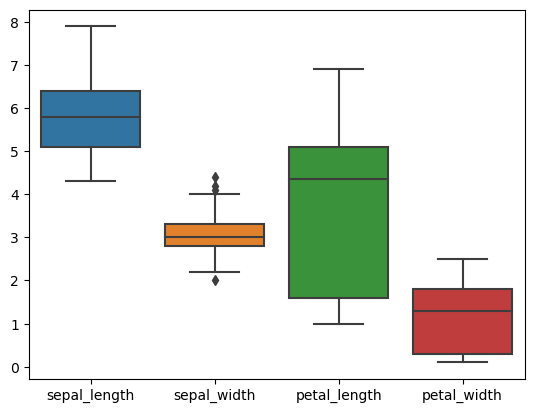

In [24]:
# 상자수염그림(박스플롯) - 시각화교안 21페이지

import seaborn as sns
sns.boxplot(data=iris)

In [27]:
iris['sepal_length'].rolling(5).mean()[4:30] # 인접한 5개의 평균

4     4.86
5     4.92
6     4.86
7     4.92
8     4.88
9     4.86
10    4.86
11    4.90
12    4.86
13    4.84
14    5.02
15    5.08
16    5.20
17    5.26
18    5.54
19    5.40
20    5.34
21    5.28
22    5.18
23    5.06
24    5.00
25    4.92
26    4.90
27    5.02
28    5.04
29    5.02
Name: sepal_length, dtype: float64

## 8.2 요약통계량

- describe()

In [28]:
# 1) 기본 요약 통계량

iris.describe() # 기본값 : 숫자열에서의 요약통계량

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
# 문자열에서의 요약통계량 : 데이터갯수, 종류(unique), 최빈데이터(top), 최빈데이터갯수(freq)

iris['species'].describe()
iris.species.describe() 

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [30]:
# 2) describe()의 include와 exclude 매개변수

df = pd.DataFrame({'a':[1,2,3]*2,
                  'b':[2.1,4]*3,
                  'c':['aaa','aaa','bbb','ccc','ddd','eee'],
                  'd':[True, False]*3})
df

,a,b,c,d
0,1,2.1,aaa,True
1,2,4.0,aaa,False
2,3,2.1,bbb,True
3,1,4.0,ccc,False
4,2,2.1,ddd,True
5,3,4.0,eee,False


In [31]:
df.describe() # 숫자열만 기본요약 통계량 출력

,a,b
count,6.000000,6.000000
mean,2.000000,3.050000
std,0.894427,1.040673
min,1.000000,2.100000
25%,1.250000,2.100000
50%,2.000000,3.050000
75%,2.750000,4.000000
max,3.000000,4.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [33]:
# include 매개변수를 통해서 요약통계량을 출력할 타입 지정 (기억이 안나면 위의 info를 사용하여 타입 확인)

df.describe(include=['float64','bool','object'])

,b,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,3.050000,NaN,NaN
std,1.040673,NaN,NaN
min,2.100000,NaN,NaN
25%,2.100000,NaN,NaN
50%,3.050000,NaN,NaN
75%,4.000000,NaN,NaN


In [34]:
df.describe(include='all') # 모든타입 열의 요약 통계량 출력

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,5,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,2,3
mean,2.000000,3.050000,NaN,NaN
std,0.894427,1.040673,NaN,NaN
min,1.000000,2.100000,NaN,NaN
25%,1.250000,2.100000,NaN,NaN
50%,2.000000,3.050000,NaN,NaN
75%,2.750000,4.000000,NaN,NaN


In [35]:
# # exclude 매개변수를 통해서 기본통계량 출력에서 제외할 타입 지정

df.describe(exclude=['float64'])

,a,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,2.000000,NaN,NaN
std,0.894427,NaN,NaN
min,1.000000,NaN,NaN
25%,1.250000,NaN,NaN
50%,2.000000,NaN,NaN
75%,2.750000,NaN,NaN


In [37]:
df['c'].unique() # 특정 컬럼의 고유값들의 종류

array(['aaa', 'bbb', 'ccc', 'ddd', 'eee'], dtype=object)

In [38]:
# 고유값들의 빈도 (알아서 빈도수 높은순으로 sort까지 해줌)

df['c'].value_counts()

aaa    2
bbb    1
ccc    1
ddd    1
eee    1
Name: c, dtype: int64

## 8.3 공분산/상관계수

In [39]:
# 공분산 : (x1-x1평균)*(x2-x2평균)들의 합을 n(행수)-1로 나눈값 : 범위가 따로 없음
# 공분산보다는 상관계수가 중요

X.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [40]:
# -1 <= 상관계수 (공분산/(x1의 표준편차 * x2의 표준편차)) <= 1

X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


- https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap)

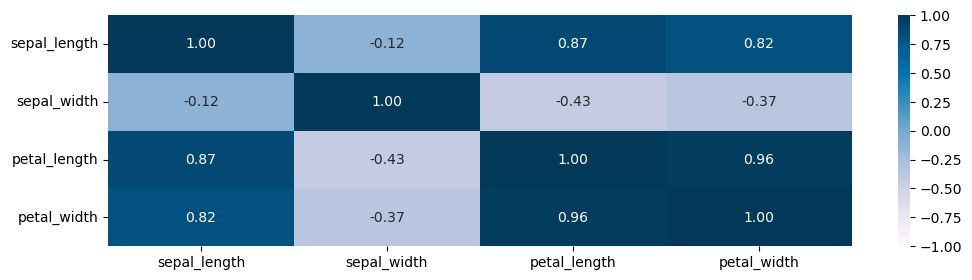

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,3))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='PuBu')
plt.show()